In [11]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:

%pip install --quiet transformers torch pillow matplotlib

In [5]:
from transformers import VisionEncoderDecoderModel, TrOCRProcessor
import torch
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

In [6]:
Tk().withdraw() 
image_path = filedialog.askopenfilename(title="Select CAPTCHA Image")

Original CAPTCHA:


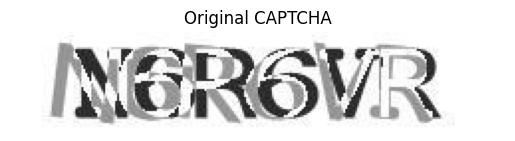

In [7]:
orig = cv2.imread(image_path)
print("Original CAPTCHA:")
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original CAPTCHA")
plt.show()

In [9]:
processor = TrOCRProcessor.from_pretrained("anuashok/ocr-captcha-v3")
model     = VisionEncoderDecoderModel.from_pretrained("anuashok/ocr-captcha-v3")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

c:\Users\dubey\anaconda3\envs\doc_extract_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dubey\.cache\huggingface\hub\models--anuashok--ocr-captcha-v3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model.

Using device: cpu


In [10]:
image = Image.open(image_path).convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

generated_ids = model.generate(
    pixel_values,
    max_length=16,
    num_beams=4,
    early_stopping=True
)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(f"\nExtracted CAPTCHA Text: {generated_text}")



Extracted CAPTCHA Text: NGR6VR
